**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Oct 30 18:23:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 16084207_9730473_5213426836.pdf
 1751.pdf
 1752.pdf
 1753.pdf
 1756.pdf
 1799.pdf
 1801.pdf
 1888.pdf
 1920.pdf
 1928.pdf
'1930 (1).pdf'
 1930.pdf
 1931.pdf
 2017188227.pdf
 2103.pdf
 2129.pdf
 292.pdf
 5220.pdf
'52 CONIC SECTION PART 3 of 8.pdf'
'53 CONIC SECTION PART 4 of 8.pdf'
'54 CONIC SECTION PART 5 of 8.pdf'
'55 CONIC SECTION PART 6 of 8.pdf'
'56 CONIC SECTION PART 7 of 8.pdf'
'57 CONIC SECTION PART 8 of 8.pdf'
'6072296 (1).pdf'
 6072296.pdf
 alcohol.pdf
'AMRITA ADMIT CARD.pdf'
 ani2.c
 Assignment-3.pdf
 assignment_Arrays,structure.docx
 AUD-20200317-WA0018.mp3
'Bishop - Pattern Recognition And Machine Learning - Springer  2006.pdf'
'BITSAT 2017.pdf'
 BITSAT-Sample-paper-3.pdf
 BITSAT-Sample-paper-4.pdf
 BITSAT-Sample-paper-5.pdf
 BITSAT-Sample-paper-6.pdf
'calc for mfi.pdf'
 Ch01.pdf
 Ch02.pdf
 Ch03.pdf
 Ch04.pdf
 Ch05.pdf
 Ch06.pdf
 Ch07.pdf
 Ch08.pdf
 Ch09.pdf
 Ch10.pdf
 Ch11.pdf
 Ch14.pdf
 Ch15.pdf
 Ch16.pdf
 Ch17.pdf
 Ch18-1.pdf
 Ch18.pdf
 Ch19.p

**1) Clone the Darknet**



In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14358, done.
remote: Total 14358 (delta 0), reused 0 (delta 0), pack-reused 14358
Receiving objects: 100% (14358/14358), 13.06 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (9765/9765), done.


**2) Compile Darknet using Nvidia GPU**


In [6]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130

**3) Configure Darknet network for training YOLO V3**

In [7]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/HackerFlow"

In [8]:
!echo "gate\nobstacle\nbucket\n" > data/obj.names
!echo -e 'classes= 3\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/HackerFlow' > data/obj.data
!mkdir data/obj

mkdir: cannot create directory ‘data/obj’: File exists


In [9]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-10-30 19:00:13--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M   243KB/s    in 13m 27s 

2020-10-30 19:13:41 (197 KB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [10]:
!cp -R /mydrive/HackOverflow/Preprocessed_Dataset -d data/obj

In [11]:
!ls data/obj/Preprocessed_Dataset/

11_10_12.jpg   11_16_158.txt  11_5_62.jpg   9_14_41.jpg   9_19_28.jpg
11_10_12.txt   11_16_163.jpg  11_5_62.txt   9_14_7.jpg	  9_19_28.txt
11_10_14.jpg   11_16_163.txt  11_7_25.jpg   9_15_101.jpg  9_19_45.jpg
11_10_14.txt   11_16_172.jpg  11_7_25.txt   9_15_101.txt  9_19_45.txt
11_10_3.jpg    11_16_172.txt  11_7_43.jpg   9_15_114.jpg  9_19_67.jpg
11_10_3.txt    11_16_173.jpg  11_7_43.txt   9_15_114.txt  9_19_67.txt
11_10_49.jpg   11_16_173.txt  11_9_121.jpg  9_15_120.jpg  9_19_80.jpg
11_10_49.txt   11_16_22.jpg   11_9_121.txt  9_15_120.txt  9_19_80.txt
11_11_132.jpg  11_16_22.txt   11_9_128.jpg  9_15_1.jpg	  9_19_84.jpg
11_11_132.txt  11_16_24.jpg   11_9_128.txt  9_15_1.txt	  9_19_84.txt
11_11_148.jpg  11_16_24.txt   11_9_133.jpg  9_15_40.jpg   9_19_94.jpg
11_11_148.txt  11_16_4.jpg    11_9_133.txt  9_15_40.txt   9_19_94.txt
11_11_157.jpg  11_16_4.txt    11_9_151.jpg  9_15_41.jpg   9_2_46.jpg
11_11_157.txt  11_16_56.jpg   11_9_151.txt  9_15_41.txt   9_2_46.txt
11_11_178.jpg  11_16_56.t

In [12]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/Preprocessed_Dataset/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()
        # print(lines)
        text_converted = []
        for line in lines:
            # print(line)
            k = line.split(" ")
            if(k[0] == '18'):
                print(line)
                print(file_path)
        #     numbers = re.findall("[0-9.]+", line)
        #     print(numbers)
        #     if numbers:

        #         # Define coordinates
        #         text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
        #         text_converted.append(text)
        #         print(i, file_path)
        #         print(text)
        # # Write file
        # with open(file_path, 'w') as fp:
        #     for item in text_converted:
        #         fp.writelines("%s\n" % item)


In [13]:
train_dataset = []
with open("data/obj/Preprocessed_Dataset/train.txt", "r") as f_o:
        lines = f_o.readlines()
        # print(lines)
        text_converted = []
        for line in lines:
            # print(line)
            file_name = line.split("/")[-1]
            file_name = file_name[0 : len(file_name) - 1]
            if(file_name.split(".")[0] in ["9_12_22", "9_12_33", "9_13_19", "9_13_25", "9_14_10", "9_14_34", "9_14_35", "9_14_41", "9_14_7", "9_18_11", "9_18_38", "9_18_7", "9_2_47", "9_3_84", "9_3_88", "9_5_72", "9_8_49", "9_9_232", "9_9_250", "9_9_32"]):
                print(file_name, " Skipped!!!!!!")
                continue
            # print(file_name)
            train_dataset.append("data/obj/Preprocessed_Dataset/" + file_name)
test_dataset = []
with open("data/obj/Preprocessed_Dataset/test.txt", "r") as f_o:
        lines = f_o.readlines()
        # print(lines)
        text_converted = []
        for line in lines:
            # print(line)
            file_name = line.split("/")[-1]
            file_name = file_name[0 : len(file_name) - 1]
            if(file_name.split(".")[0] in ["9_12_22", "9_12_33", "9_13_19", "9_13_25", "9_14_10", "9_14_34", "9_14_35", "9_14_41", "9_14_7", "9_18_11", "9_18_38", "9_18_7", "9_2_47", "9_3_84", "9_3_88", "9_5_72", "9_8_49", "9_9_232", "9_9_250", "9_9_32"]):
                print(file_name, " Skipped!!!!!!")
                continue
            # print(file_name)
            test_dataset.append("data/obj/Preprocessed_Dataset/" + file_name)


9_12_22.jpg  Skipped!!!!!!
9_12_33.jpg  Skipped!!!!!!
9_13_19.jpg  Skipped!!!!!!
9_13_25.jpg  Skipped!!!!!!
9_14_10.jpg  Skipped!!!!!!
9_14_34.jpg  Skipped!!!!!!
9_14_35.jpg  Skipped!!!!!!
9_14_41.jpg  Skipped!!!!!!
9_14_7.jpg  Skipped!!!!!!
9_18_11.jpg  Skipped!!!!!!
9_18_38.jpg  Skipped!!!!!!
9_18_7.jpg  Skipped!!!!!!


In [14]:
print("Test Dataset is : \n", train_dataset)
print("Test Dataset is : \n", test_dataset)

Test Dataset is : 
 ['data/obj/Preprocessed_Dataset/11_10_12.jpg', 'data/obj/Preprocessed_Dataset/11_10_14.jpg', 'data/obj/Preprocessed_Dataset/11_10_3.jpg', 'data/obj/Preprocessed_Dataset/11_10_49.jpg', 'data/obj/Preprocessed_Dataset/11_11_132.jpg', 'data/obj/Preprocessed_Dataset/11_11_148.jpg', 'data/obj/Preprocessed_Dataset/11_11_157.jpg', 'data/obj/Preprocessed_Dataset/11_11_178.jpg', 'data/obj/Preprocessed_Dataset/11_11_247.jpg', 'data/obj/Preprocessed_Dataset/11_11_248.jpg', 'data/obj/Preprocessed_Dataset/11_11_254.jpg', 'data/obj/Preprocessed_Dataset/11_11_264.jpg', 'data/obj/Preprocessed_Dataset/11_11_269.jpg', 'data/obj/Preprocessed_Dataset/11_11_272.jpg', 'data/obj/Preprocessed_Dataset/11_11_279.jpg', 'data/obj/Preprocessed_Dataset/11_11_318.jpg', 'data/obj/Preprocessed_Dataset/11_11_321.jpg', 'data/obj/Preprocessed_Dataset/11_11_382.jpg', 'data/obj/Preprocessed_Dataset/11_11_392.jpg', 'data/obj/Preprocessed_Dataset/11_11_45.jpg', 'data/obj/Preprocessed_Dataset/11_11_55.jpg',

In [15]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(train_dataset)) 
file.close() 
file = open("data/test.txt", "w") 
file.write("\n".join(test_dataset)) 
file.close() 

**6) Start the training**

In [25]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/HackerFlow/yolov3_training_last.weights /mydrive/HackOverflow/-dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_training
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.604 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs:  64 x 

# Testing the localizer

In [17]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   3 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   5 conv    128       3 x 3/ 2    128 x 128 x  64 ->   64 x  64 x 128 0.604 BF
   6 conv     64       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x  64 0.067 BF
   7 conv    128       3 x 3/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.604 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs:  64 x  64 x 128 0.001 

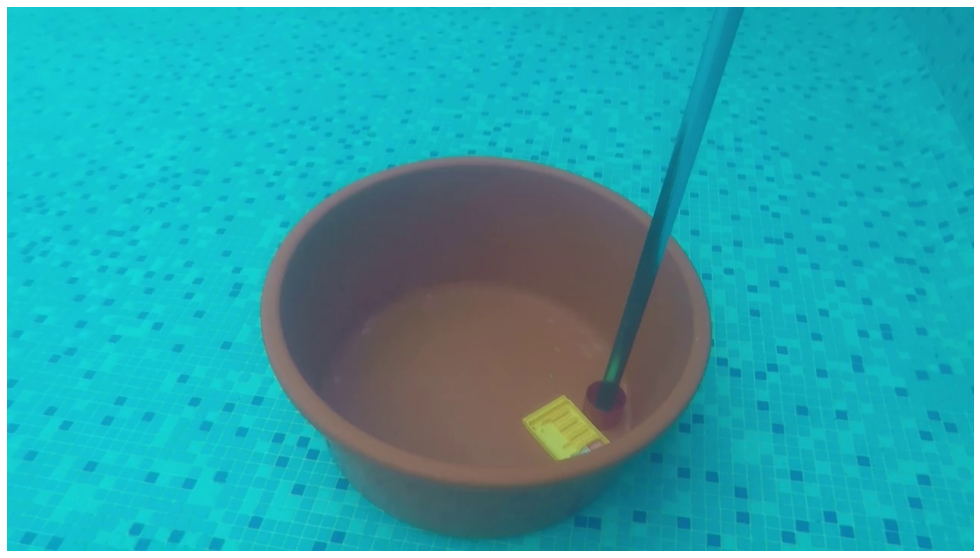

In [32]:
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /mydrive/HackerFlow/yolov3_training_last.weights /content/15_151.jpeg -thresh 0.1
imShow('/content/15_151.jpeg')